#   Case Study #4: Data Bank
###  A. Customer Nodes Exploration
#### Case Study Questions
#### How many unique nodes are there on the Data Bank system?
#### What is the number of nodes per region?
#### How many customers are allocated to each region?
#### How many days on average are customers reallocated to a different node?
#### What is the median, 80th and 95th percentile for this same reallocation days metric for each region?

### 1. How many unique nodes are there on the Data Bank system?


* Use COUNT DISTINCT to count the number of unique nodes

```sql
SELECT COUNT(DISTINCT node_id) AS number_of_unique_nodes
FROM customer_nodes;

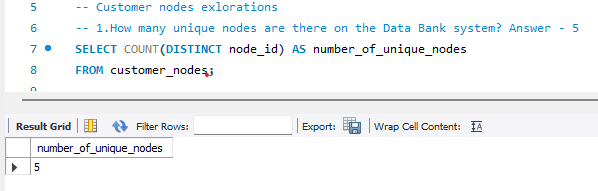

### 2. What is the number of nodes per region?
 
* Use COUNT to count the number of nodes per Region then INNER JOIN to join the Customer_nodes Table to the Regions Table

```sql
SELECT
re.region_name, 
re.region_id,
count(ct.node_id) AS number_to_nodes
FROM regions AS re
JOIN customer_nodes AS ct
	ON re.region_id = ct.region_id
GROUP BY
	re.region_name, re.region_id
ORDER BY count(ct.node_id) DESC;


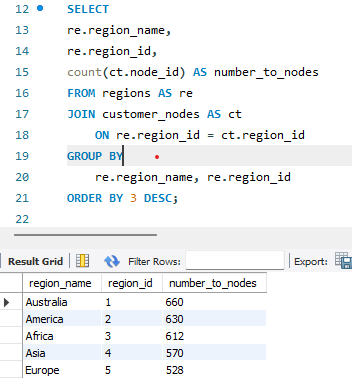

### 3. How many customers are allocated to each region?

* Use COUNT DISTINCT to count the number of customers allocated to each region, then INNER JOIN to join the Customer_nodes Table to the Regions Table

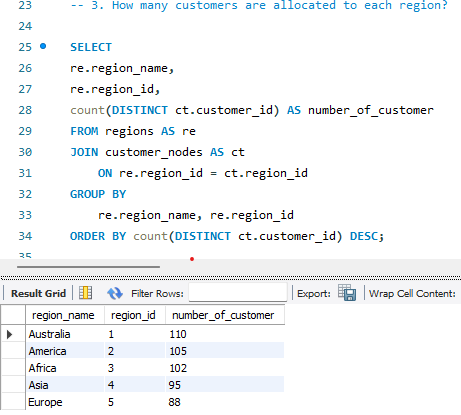

### 4. How many days on average are customers reallocated to a different node?

* This SQL query calculates the average number of days a customer spends on a specific node. It first determines the total duration (in days) each customer spent on each unique node using a Common Table Expression (CTE) called days_in_nodes. Then, it calculates the average of these durations across all customer-node combinations to find the average reallocation period to a different node

```sql
WITH days_in_nodes AS(SELECT customer_id,
 node_id,
 sum(DATEDIFF(end_date , start_date)) AS days
FROM customer_nodes
group by customer_id, node_id)
SELECT ROUND(AVG(days),0) AS Avg_day_in_node
FROM days_in_nodes;

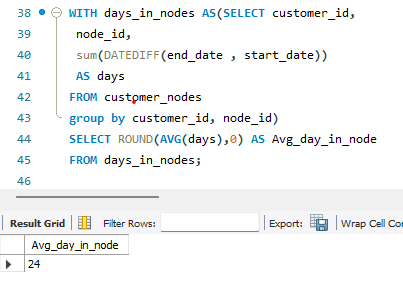

### 5. What is the median, 80th and 95th percentile for this same reallocation days metric for each region?




```sql

with days_in_nodes_region AS(
SELECT r.region_name,
	c.customer_id,
    c.node_id,
    SUM(DATEDIFF(c.end_date, c.start_date)) AS days
FROM customer_nodes AS c
INNER JOIN regions AS r
	ON c.region_id = r.region_id
GROUP BY r.region_name,
	c.customer_id,
    c.node_id),
    
orders AS (SELECT region_name,
    days,
    ROW_NUMBER() OVER(PARTITION BY region_name ORDER BY days) AS rn
FROM days_in_nodes_region),

max_row AS  (SELECT region_name,
    MAX(rn) AS max_rn
FROM orders
GROUP BY region_name)

SELECT o.region_name,
CASE
	WHEN rn = ROUND(m.max_rn / 2,0) then 'MEDIAN'
    WHEN rn = ROUND(m.max_rn * 0.80,0) THEN '80th Percentile'
    WHEN rn = Round(m.max_rn * 0.95,0) THEN '95th Percentile'
end AS metrecis,
days AS value_in_days
FROM orders AS o
INNER JOIN max_row AS m
	ON o.region_name = m.region_name
WHERE o.rn IN( ROUND(m.max_rn / 2,0),
	ROUND(m.max_rn * 0.80,0),
    ROUND(m.max_rn * 0.95,0));
    

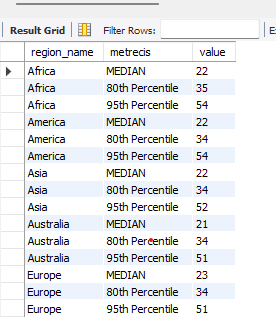